# IE343 -- Statistical Machine Learning and Its Applications
## Lab 9: Unsupervised Learning
- [1. Principal Component Analysis](#1.-Principal-Component-Analysis)
- [2. Clustering](#2.-Clustering)
    - [2.1. K-Means Clustering](#2.1.-K-Means-Clustering)
    - [2.2. Hierarchical Clustering](#2.2.-Hierarchical-Clustering)
- [3. NCI60 Data Example](#3.-NCI60-Data-Example)
    - [3.1. PCA](#3.1.-PCA)
    - [3.2. Clustering](#3.2.-Clustering)

In [179]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

## 1. Principal Component Analysis

### Goal: Find the direction which maximizes the variance of the projected observations
<div>
<img src="figures/PCA_equation1.png" width="500"/>
</div>

<div>
<img src="figures/PCA_equation2.png" width="500"/>
</div>

### Two formulations of PCA

<div>
<img src="figures/PCA.png" width="500"/>
</div>

### Applying PCA on USAssult dataset
- The principal component loading vectors.
<div>
<img src="figures/PC.png" width="500"/>
</div>

- The first two principal components.
<div>
<img src="figures/PC_plot.png" width="500"/>
</div>

- Proportion of Variance Explained (PVE)
<div>
<img src="figures/PVE.png" width="200"/>
</div>

- Scree plot
<div>
<img src="figures/scree.png" width="500"/>
</div>

In [180]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [181]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [182]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [183]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [184]:
X.mean()

Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64

In [185]:
X.var()

Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64

In [186]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [189]:
X.shape

(50, 4)

In [187]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


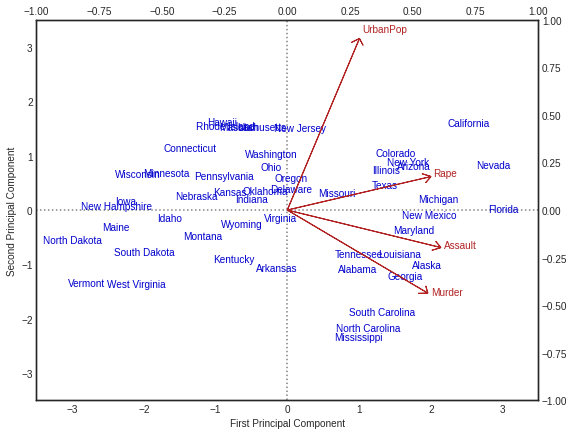

In [190]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center', color='mediumblue')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i]*a, -pca_loadings.PC2.loc[i]*a), color='firebrick')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0], color="firebrick", head_width=0.05, head_length=0.03, overhang=1)
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1], color="firebrick", head_width=0.05, head_length=0.03, overhang=1)
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2], color="firebrick", head_width=0.05, head_length=0.03, overhang=1)
ax2.arrow(0,0,pca_loadings.PC1[3], -pca_loadings.PC2[3], color="firebrick", head_width=0.05, head_length=0.03, overhang=1);

In [191]:
# Variance of the four principal components
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [192]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

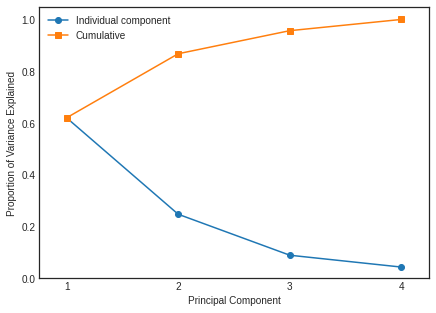

In [193]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

## 2. Clustering

### 2.1. K-Means Clustering

- Objective function
<div>
<img src="figures/kmeans_1.png" width="500"/>
</div>

- Important property
<div>
<img src="figures/kmeans_2.png" width="500"/>
</div>

<div>
<img src="figures/kmeans_alg.png" width="600"/>
</div>

<div>
<img src="figures/kmeans_ex.png" width="500"/>
</div>

In [194]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((25,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

#### K = 2

In [195]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [196]:
km1.labels_

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0], dtype=int32)

####  K = 3

In [197]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [198]:
pd.Series(km2.labels_).value_counts()

1    10
2     8
0     7
dtype: int64

In [199]:
km2.cluster_centers_

array([[ 3.56013223, -4.72572468],
       [ 1.94442784, -4.33312855],
       [ 2.53949074, -2.53212129]])

In [200]:
km2.labels_

array([1, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2,
       0, 0, 1], dtype=int32)

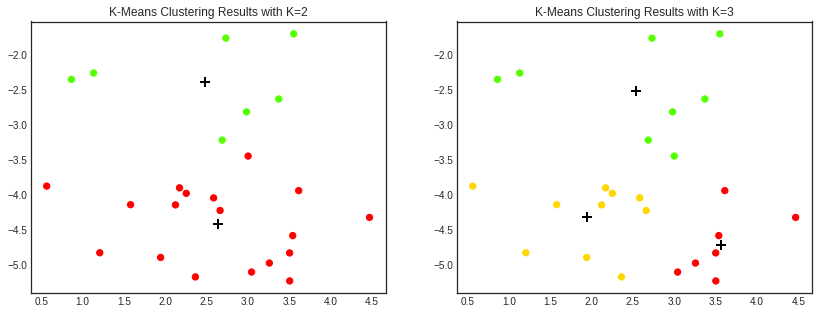

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### 2.2. Hierarchical Clustering

<div>
<img src="figures/hc_ex.png" width="1500"/>
</div>

<div>
<img src="figures/hc_linkage_1.png" width="1000"/>
</div>
<div>
<img src="figures/hc_linkage_2.png" width="1000"/>
</div>

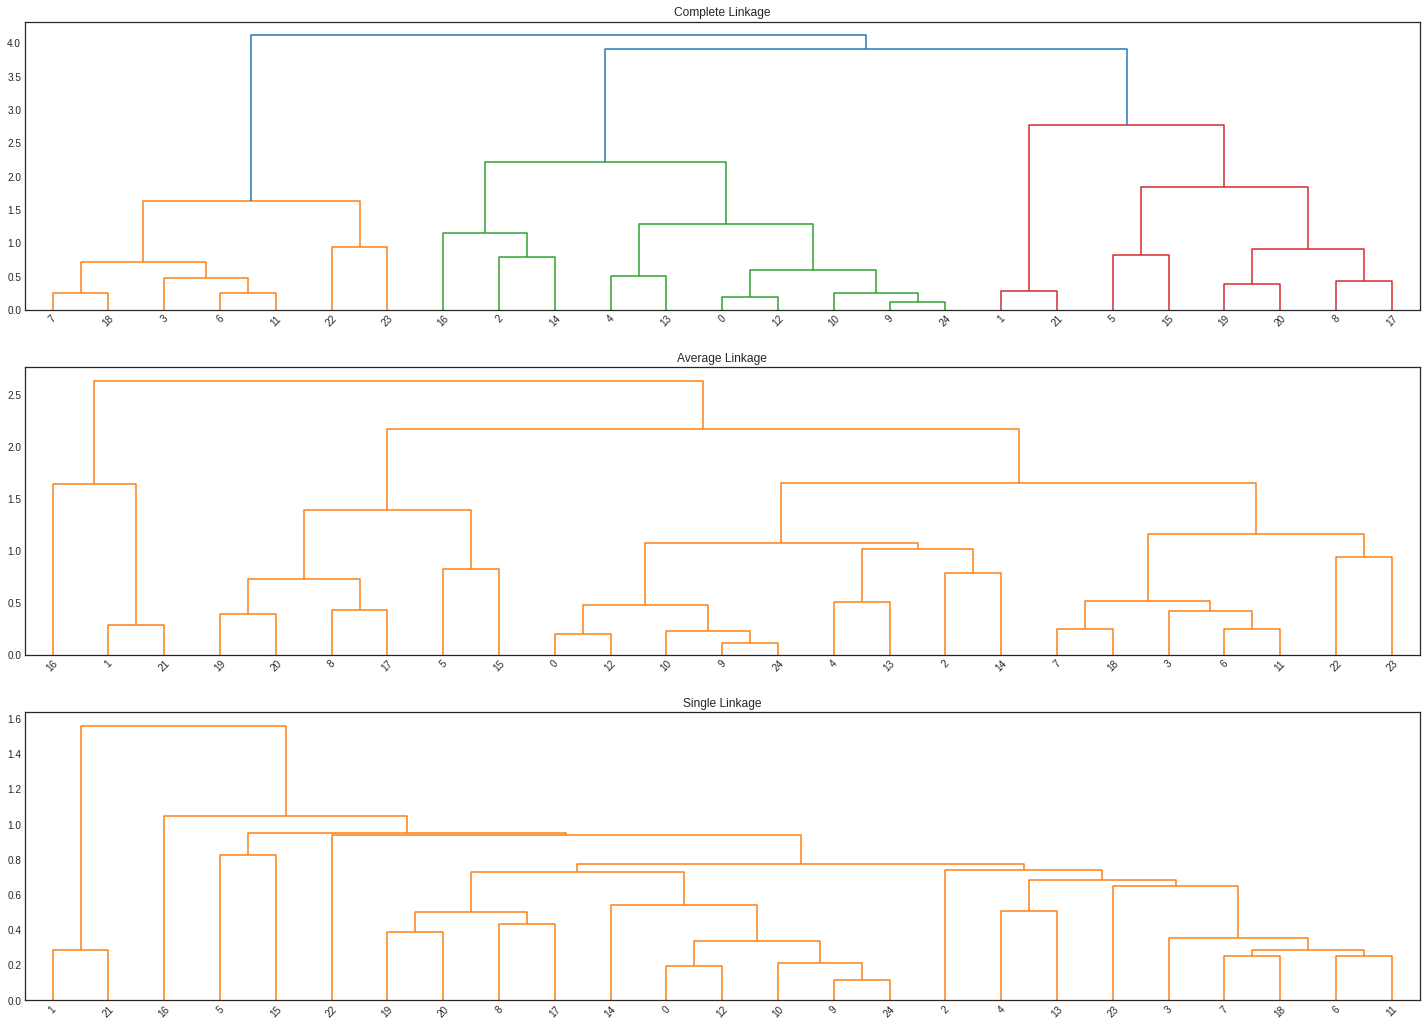

In [204]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(25,18))

# color_threshold: Determines where to cut
for linkage, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], [ax1,ax2,ax3]):
    hierarchy.dendrogram(linkage, ax=ax, color_threshold=3.5)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

## 3. NCI60 Data Example

### 3.1. PCA

In [205]:
# One file (NCI60_X) is for the features and another file (NCI60_y) is for the classes/types.
df2 = pd.read_csv('NCI60_X.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)

In [206]:
X = pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [207]:
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [208]:
y.type.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
UNKNOWN        1
MCF7A-repro    1
K562A-repro    1
MCF7D-repro    1
Name: type, dtype: int64

In [209]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

In [210]:
df2_plot.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14


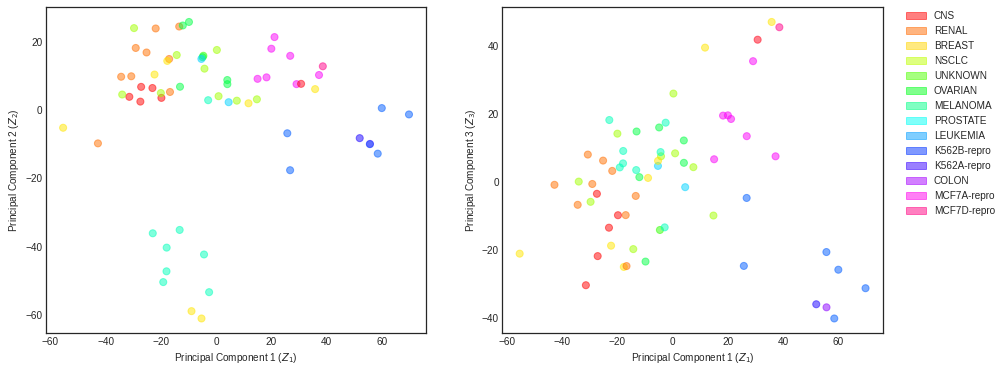

In [211]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2 ($Z_2$)')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3 ($Z_3$)')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1 ($Z_1$)')    

In [214]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).values,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


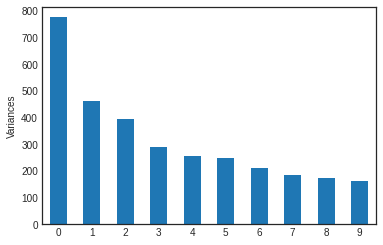

In [215]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

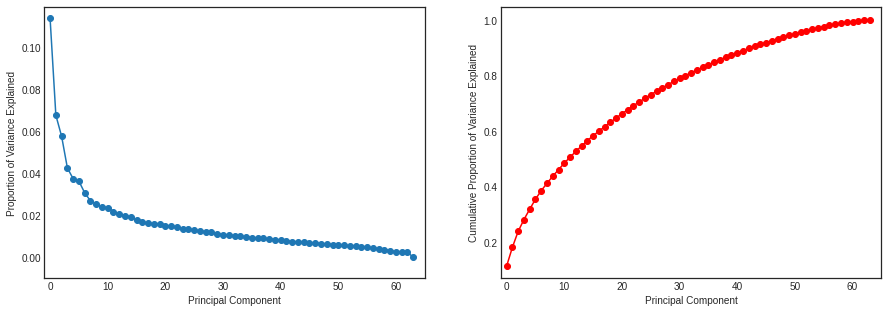

In [216]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)    

### 3.2. Clustering

In [217]:
X= pd.DataFrame(scale(df2), index=y.type, columns=df2.columns)

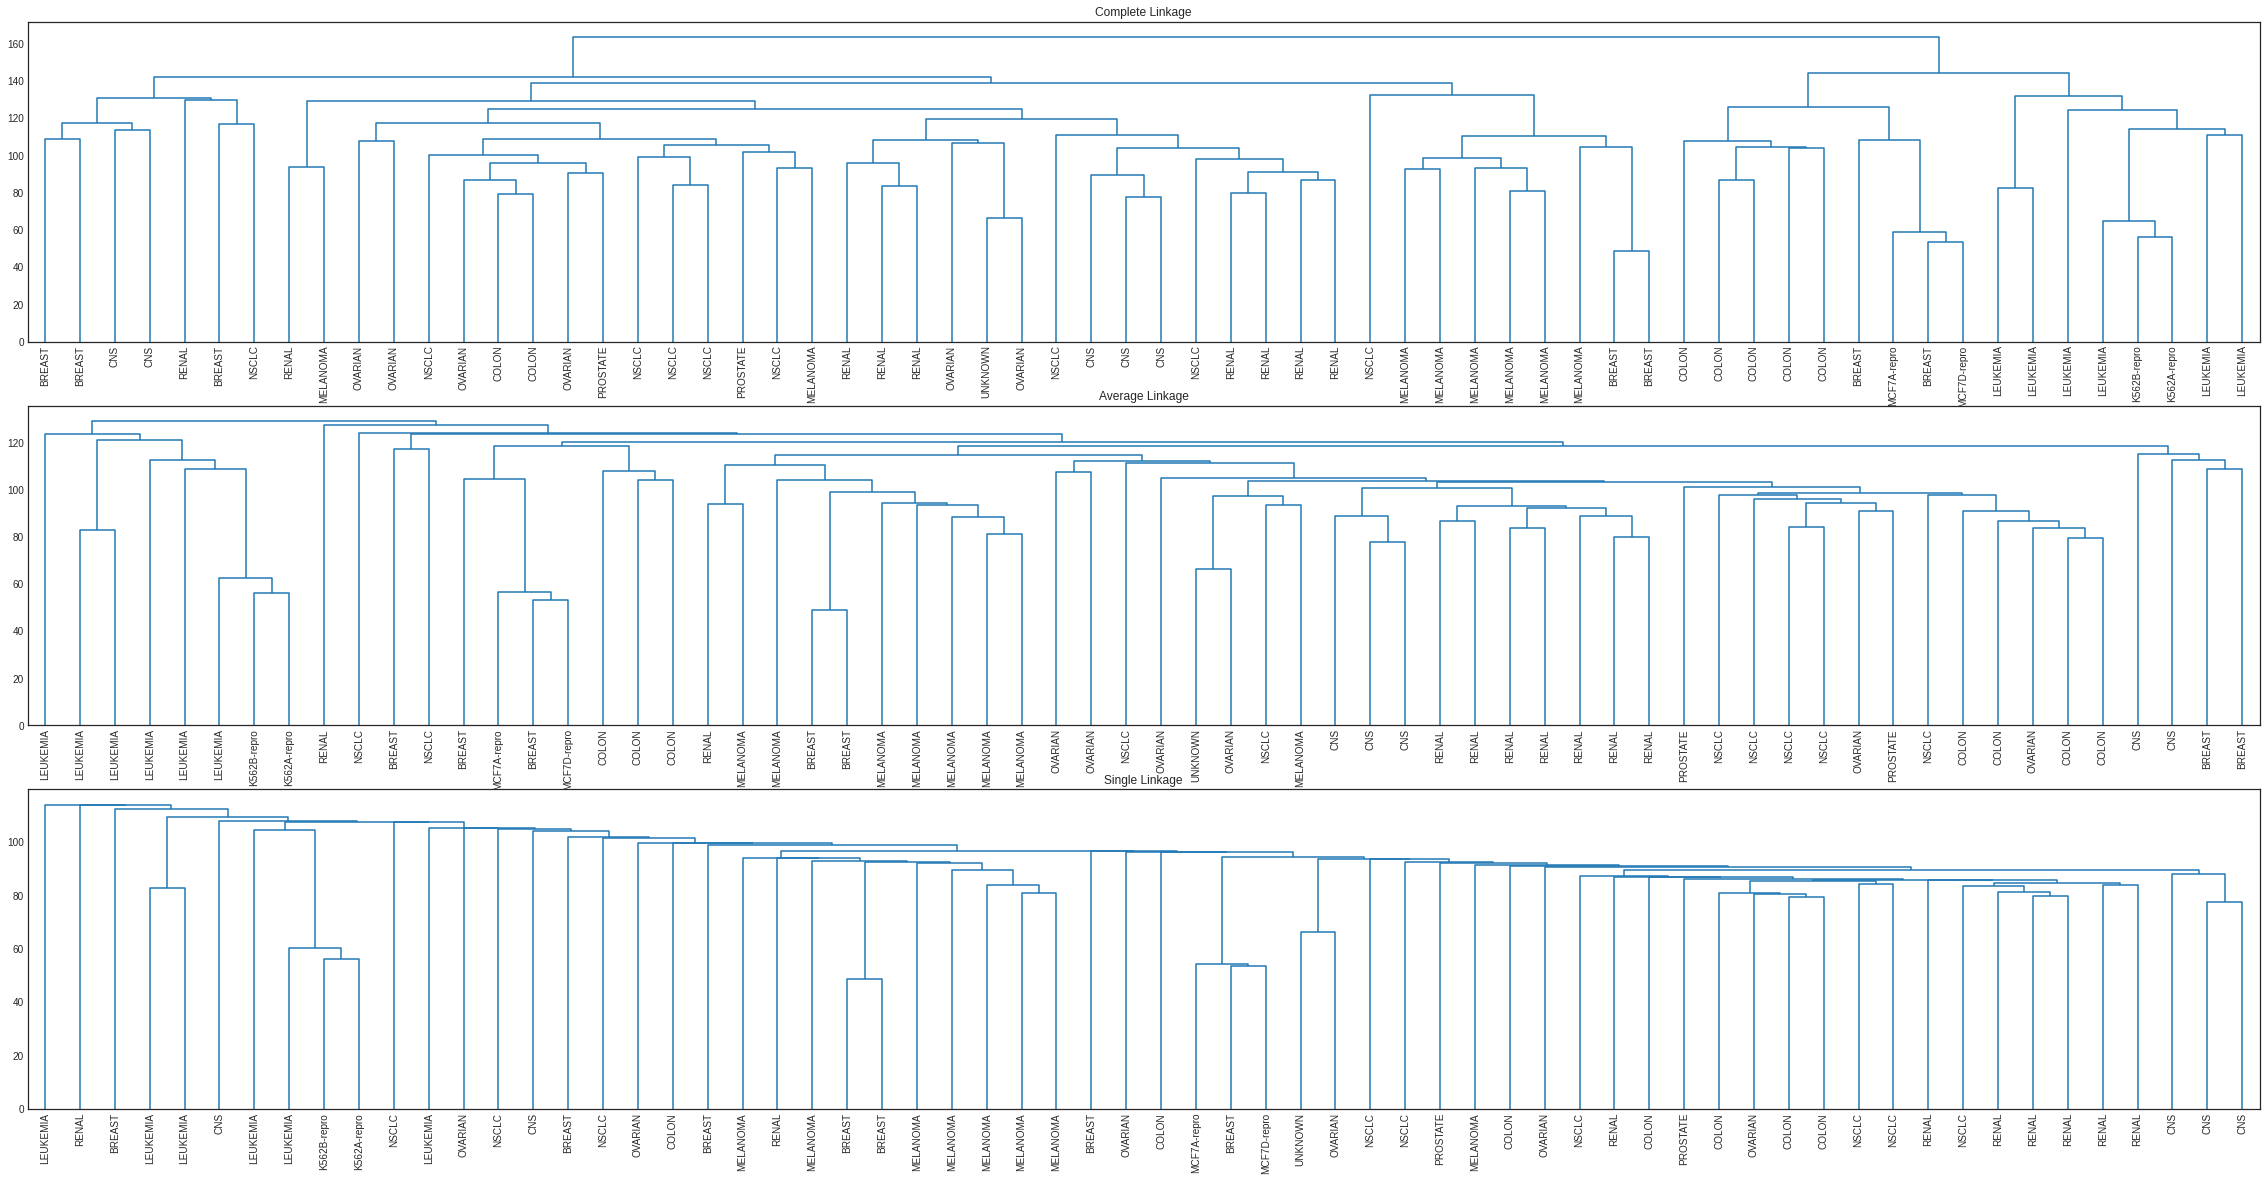

In [218]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(40,20))

for linkage, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], [ax1,ax2,ax3]):
    hierarchy.dendrogram(linkage, labels=X.index,color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

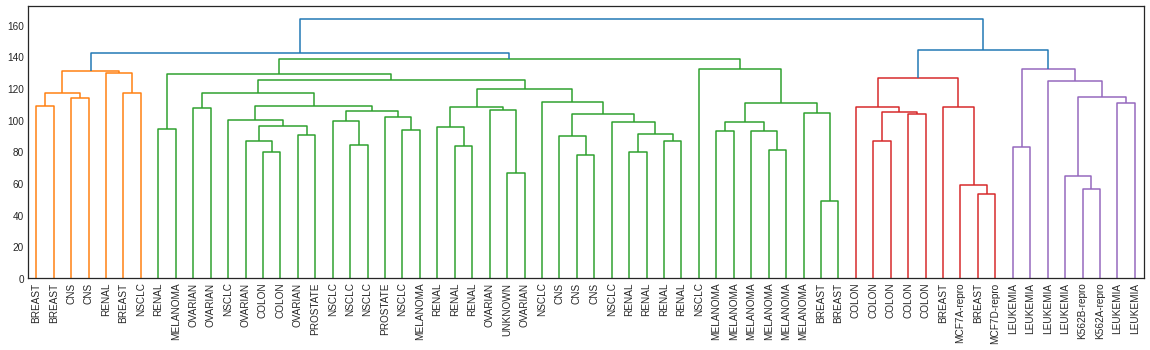

In [219]:
plt.figure(figsize=(20,5))
cut4 = hierarchy.dendrogram(hierarchy.complete(X), labels=X.index, color_threshold=140, leaf_font_size=10)

##### KMeans

In [220]:
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
km4.fit(X)

KMeans(n_clusters=4, n_init=50)

In [221]:
km4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [222]:
# Observations per KMeans cluster
pd.Series(km4.labels_).value_counts().sort_index()

0     8
1    23
2    24
3     9
dtype: int64

##### Hierarchical

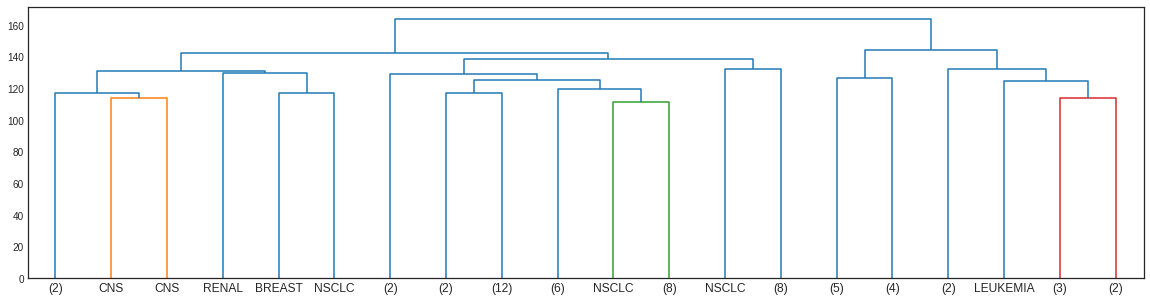

In [223]:
# Observations per Hierarchical cluster
plt.figure(figsize=(20,5))
cut4b = hierarchy.dendrogram(hierarchy.complete(X), labels=X.index, truncate_mode='lastp', p=20, show_leaf_counts=True)

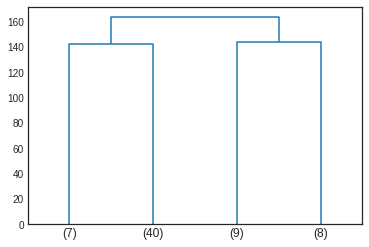

In [224]:
cut4b = hierarchy.dendrogram(hierarchy.complete(X), labels=X.index, truncate_mode='lastp', p=4, show_leaf_counts=True)

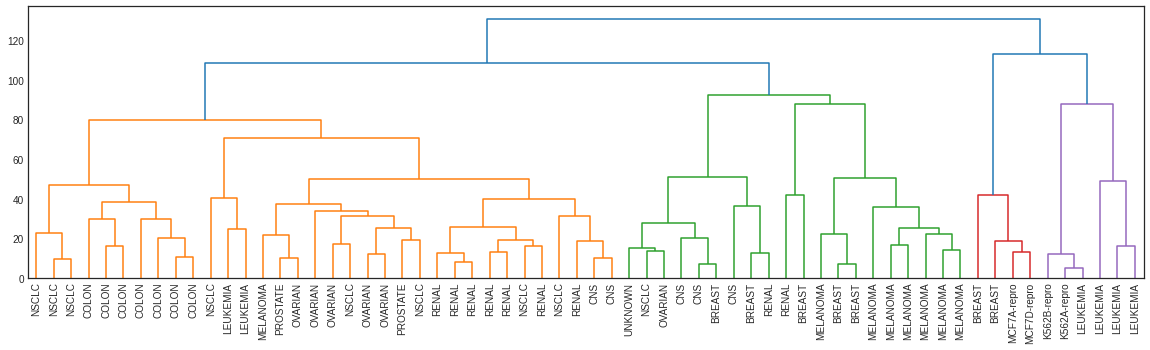

In [226]:
# Hierarchy based on Principal Components 1 to 5
plt.figure(figsize=(20,5))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), labels=X.index, color_threshold=100, leaf_font_size=10)

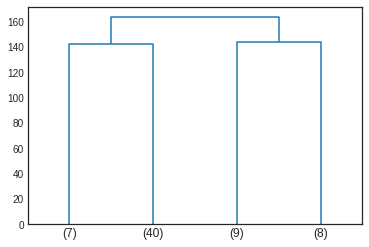

In [227]:
cut4c = hierarchy.dendrogram(hierarchy.complete(df2_plot), labels=X.index, truncate_mode='lastp', p=4, show_leaf_counts=True)